In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings("ignore")

In [18]:
a_o = pd.read_csv('/Users/lindasegalini/Desktop/GitHub/The-Data-Series/Episode 9.2/apples_and_oranges.csv')

#display first few rows of data
a_o.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


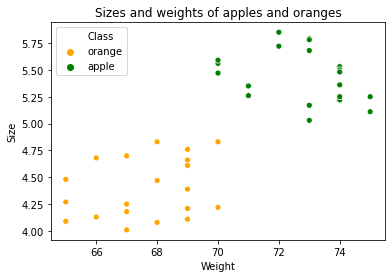

In [19]:
#--create a color dictionary to color classes --#

color_dict = dict({'orange':'orange',
                   'apple' : 'green'})

#--scatterplot 
plt.title('Sizes and weights of apples and oranges')
sns.scatterplot(data = a_o, x="Weight", y = "Size", hue ="Class", palette = color_dict)

In [9]:
#-- defining input data
X = a_o[['Weight', 'Size']]

# define target

y = a_o.Class

#fitting SVM using a linear kernel

from sklearn import svm

clf =svm.SVC(kernel ='linear', C=10) # -- 'C' is the 'cost' or penalty for misclassifications
clf.fit(X,y)

SVC(C=10, kernel='linear')

In [10]:
# -- to obtain the coefficent of the hyperplane

clf.coef_

array([[-0.65759054, -3.11967429]])

In [11]:
clf.intercept_

array([62.09725159])

In [12]:
#-- Putting the hyperplane into a linear SVM formula

b = clf.intercept_
w_1 = clf.coef_[0][0]
w_2 = clf.coef_[0][1]

b,w_1,w_2

(array([62.09725159]), -0.6575905440882028, -3.1196742877366077)

 This is the SVM hyperplane formula
 
 62.09725159 - 0.6575905440882028Weight - 3.1196742877366077Size = 0  

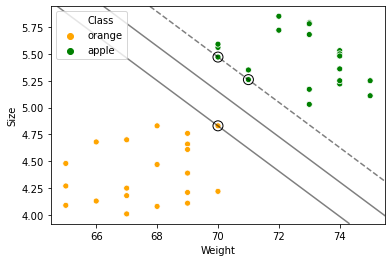

In [16]:
#--Plotting the hyperplane and support vector lines --#

ax = plt.gca()
sns.scatterplot(data = a_o, x = 'Weight', y = 'Size', hue = 'Class', palette = color_dict)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors ='k', levels = [-1,0,1], alpha =0.5, linstyles = ['--','-','--'])

ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=100, linewidth=1, facecolors ='none', edgecolors ='k')
plt.show()

In [20]:
#-- obtain the values of the three support vectors along the lines --#
clf.support_vectors_

array([[70.  ,  5.47],
       [71.  ,  5.26],
       [70.  ,  4.83]])

In [22]:
#-- Lets make a prediction with a new weight of 70 grams and size of 4.6 centimeters
clf.predict([[70, 4.6]])

#-- The prediction is an orange --#

array(['orange'], dtype=object)